In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision.transforms import ToTensor
import torch
from torch.utils.data import Dataset
import numpy as np

In [88]:

class ImageData(Dataset):
    def __init__(self):
        self.df = pd.read_csv("Data_paths.csv")
        
    def __len__(self):
        return len(self.df.index)
    
    def __getitem__(self, idx):
        image = np.load(self.df.iloc[idx]['path'])
        image = np.moveaxis(image, 2, 0)
        print(image.shape)

        image = torch.as_tensor(image, dtype = torch.uint8)
        
        image = torch.flatten(image)
        
        return image, self.df.iloc[idx]['moa']
    

In [89]:
data = ImageData()

(3, 68, 68)


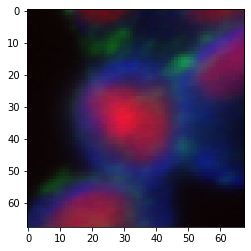

In [93]:
image, moa = data.__getitem__(5)
def show_image(image):
    image = image.reshape(3, 68, 68)
    image = torch.moveaxis(image, 0, 2)
    plt.imshow(image)
show_image(image)